<a href="https://colab.research.google.com/github/alinatkachuk/1_Basics_of_software_code_development/blob/master/homeworks/lab01_ml_pipeline/lab01_part2_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-11-15 15:08:33--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2025-11-15 15:08:33 (5.00 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,725,91,37,76,138,55,8,132,51,18,135,157,256,124,69,0,12,191,192
1,803,93,47,84,205,71,7,176,36,21,152,190,476,201,70,7,19,198,201
2,85,110,58,106,180,51,6,261,26,28,171,278,998,257,83,9,13,181,182
3,671,103,41,83,194,63,9,175,38,21,142,199,455,138,65,7,30,197,206
4,179,89,44,70,137,58,6,136,49,18,146,168,273,166,78,10,3,186,187
5,18,104,54,100,186,61,10,216,31,24,173,225,686,220,74,5,11,185,195
6,340,89,40,72,155,63,7,146,45,19,135,175,321,145,72,4,10,192,196
7,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202
8,167,110,51,104,191,57,12,213,31,24,162,226,674,190,68,18,2,191,199
9,503,91,39,72,133,55,7,146,46,19,132,170,314,149,77,9,18,184,189


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,432.114754,93.839709,44.765027,81.872495,169.358834,61.817851,8.433515,168.934426,40.865209,20.588342,147.571949,188.744991,440.672131,174.539162,72.449909,6.557377,12.568306,189.030965,195.491803
std,240.666501,8.335779,6.190806,15.647408,32.834864,7.971412,4.491440,33.163102,7.790602,2.588917,14.451808,31.241299,176.701194,32.845869,7.308114,5.006099,9.010809,6.200788,7.435024
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,177.000000,181.000000
25%,225.000000,87.000000,40.000000,70.000000,142.000000,57.000000,6.000000,147.000000,34.000000,19.000000,136.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,431.000000,93.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,644.000000,100.000000,49.000000,96.000000,195.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,216.000000,575.000000,198.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,186.000000,287.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [18]:
from sklearn.preprocessing import StandardScaler

# Processing of outliers by 6 feature (max=52 at 75% percentile=10)
def cap_outliers(X, lower_percentile=1, upper_percentile=99):
    X_capped = X.copy()
    for i in range(X.shape[1]):
        lower_bound = np.percentile(X[:, i], lower_percentile)
        upper_bound = np.percentile(X[:, i], upper_percentile)
        X_capped[:, i] = np.clip(X[:, i], lower_bound, upper_bound)
    return X_capped

# Process outliers only in problematic features
problem_features = [6]  # Index of the problematic feature

X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

for feature_idx in problem_features:
    lower_bound = np.percentile(X_train[:, feature_idx], 1)
    upper_bound = np.percentile(X_train[:, feature_idx], 99)

    X_train_processed[:, feature_idx] = np.clip(X_train[:, feature_idx], lower_bound, upper_bound)
    X_test_processed[:, feature_idx] = np.clip(X_test[:, feature_idx], lower_bound, upper_bound)

print(f"6 feature after processing:")
print(f"Min: {X_train_processed[:, 6].min()}, Avg: {X_train_processed[:, 6].mean():.2f}, Max: {X_train_processed[:, 6].max()}")

print()

# Scaling
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_processed)
X_test_final = scaler.transform(X_test_processed)

print(f"Training data: {X_train_final.shape}")
print(f"Test data: {X_test_final.shape}")

6 feature after processing:
Min: 4, Avg: 8.17, Max: 16

Training data: (549, 19)
Test data: (297, 19)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Performing grid search for logistic regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters: {'C': 2, 'penalty': 'l2'}
Best cross-validation score: 0.7817

Test Results:
Accuracy: 0.7643
F1-score (macro): 0.7644

Classification Report:
              precision    recall  f1-score   support

         bus       0.92      0.88      0.90        77
        opel       0.61      0.61      0.61        77
        saab       0.61      0.60      0.60        72
         van       0.92      0.97      0.95        71

    accuracy                           0.76       297
   macro avg       0.76      0.77      0.76       297
weighted avg       0.76      0.76      0.76       297



<Figure size 1000x800 with 0 Axes>

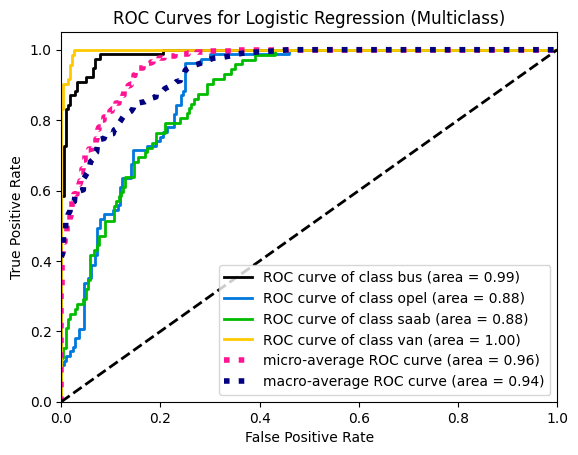

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import scipy
if not hasattr(scipy, "interp"):
    scipy.interp = np.interp
import scikitplot as skplt

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500
)

param_grid = {
    'C': [0.5, 1, 2],  # Small range around 1
    'penalty': ['l2']   # Only one penalty type to simplify
}

grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

print("Performing grid search for logistic regression")
grid_search.fit(X_train_final, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test_final)
y_pred_proba = best_log_reg.predict_proba(X_test_final)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nTest Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (macro): {f1:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.title('ROC Curves for Logistic Regression (Multiclass)')
plt.show()

In [32]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

!pip install git+https://github.com/reiinakano/scikit-plot.git

  Cloning https://github.com/reiinakano/scikit-plot.git to /tmp/pip-req-build-fgb9boz8
  Running command git clone --filter=blob:none --quiet https://github.com/reiinakano/scikit-plot.git /tmp/pip-req-build-fgb9boz8
  Resolved https://github.com/reiinakano/scikit-plot.git to commit 2dd3e6a76df77edcbd724c4db25575f70abb57cb
  Preparing metadata (setup.py) ... done


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

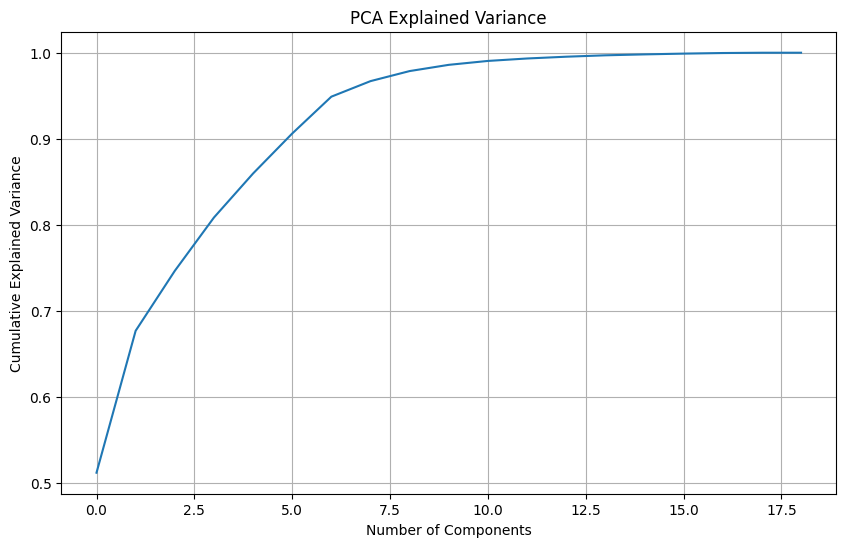

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_train_final)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('pca', PCA(n_components=0.95))
])

X_train_pca = pipeline.fit_transform(X_train_final)
X_test_pca = pipeline.transform(X_test_final)

print(f"The appropriate number of components: {X_train_pca.shape[1]}")

The appropriate number of components: 8


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.base import clone
from sklearn.metrics import f1_score
import numpy as np

# Убираем multi_class чтобы избежать предупреждений
log_reg = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, random_state=42)
tree = DecisionTreeClassifier(max_depth=10, random_state=42)

# Бэггинг
n_estimators_range = range(2, 101, 5)
log_reg_scores, tree_scores = [], []

for n_est in n_estimators_range:
    bagging_lr = BaggingClassifier(estimator=clone(log_reg), n_estimators=n_est, random_state=42)
    bagging_lr.fit(X_train_final, y_train)
    log_reg_scores.append(f1_score(y_test, bagging_lr.predict(X_test_final), average='macro'))

    bagging_tree = BaggingClassifier(estimator=clone(tree), n_estimators=n_est, random_state=42)
    bagging_tree.fit(X_train_final, y_train)
    tree_scores.append(f1_score(y_test, bagging_tree.predict(X_test_final), average='macro'))

print("Best LR ensemble size:", n_estimators_range[np.argmax(log_reg_scores)])
print("Best Tree ensemble size:", n_estimators_range[np.argmax(tree_scores)])


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best LR ensemble size: 7
Best Tree ensemble size: 47


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 7, 10, 15, 20, None]}
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_final, y_train)

best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test_final)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

Best max_depth: 5
Accuracy: 0.7172
F1-score: 0.7130


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


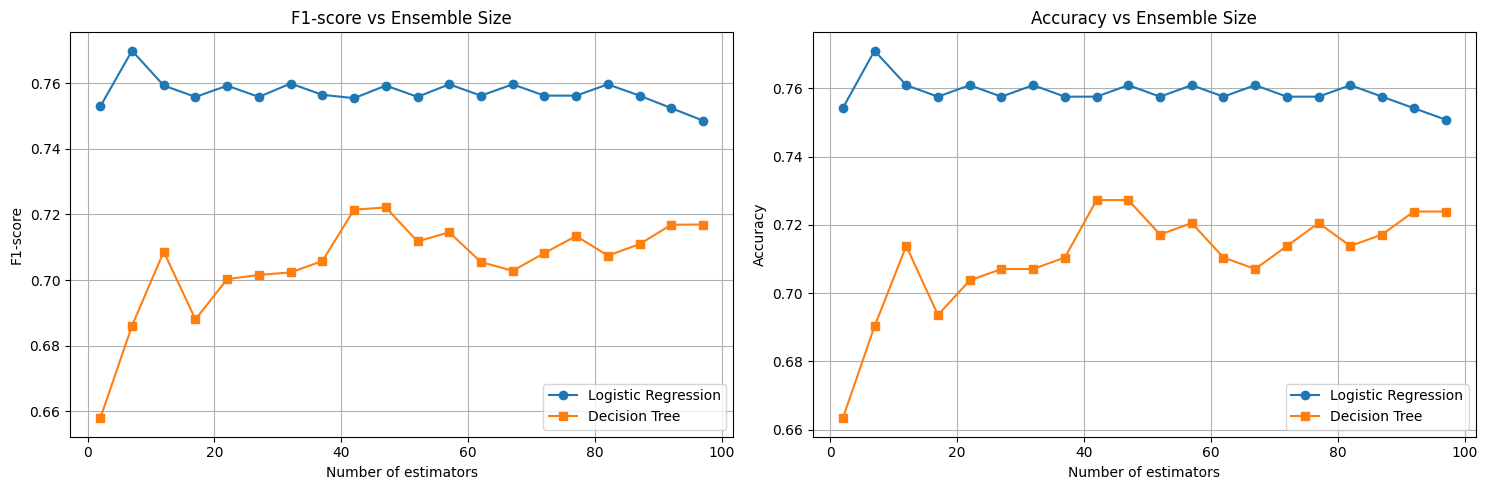

Optimal ensemble size - Logistic Regression: 7 (F1: 0.7699)
Optimal ensemble size - Decision Tree: 47 (F1: 0.7221)


In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

log_reg = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, random_state=42)
tree = DecisionTreeClassifier(max_depth=10, random_state=42)

n_estimators_range = range(2, 101, 5)
log_reg_f1, log_reg_acc = [], []
tree_f1, tree_acc = [], []

for n_est in n_estimators_range:
    bagging_lr = BaggingClassifier(estimator=log_reg, n_estimators=n_est, random_state=42)
    bagging_lr.fit(X_train_final, y_train)
    y_pred_lr = bagging_lr.predict(X_test_final)
    log_reg_f1.append(f1_score(y_test, y_pred_lr, average='macro'))
    log_reg_acc.append(accuracy_score(y_test, y_pred_lr))

    bagging_tree = BaggingClassifier(estimator=tree, n_estimators=n_est, random_state=42)
    bagging_tree.fit(X_train_final, y_train)
    y_pred_tree = bagging_tree.predict(X_test_final)
    tree_f1.append(f1_score(y_test, y_pred_tree, average='macro'))
    tree_acc.append(accuracy_score(y_test, y_pred_tree))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(n_estimators_range, log_reg_f1, label='Logistic Regression', marker='o')
ax1.plot(n_estimators_range, tree_f1, label='Decision Tree', marker='s')
ax1.set_xlabel('Number of estimators')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-score vs Ensemble Size')
ax1.legend()
ax1.grid(True)

ax2.plot(n_estimators_range, log_reg_acc, label='Logistic Regression', marker='o')
ax2.plot(n_estimators_range, tree_acc, label='Decision Tree', marker='s')
ax2.set_xlabel('Number of estimators')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs Ensemble Size')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

best_lr_f1 = n_estimators_range[np.argmax(log_reg_f1)]
best_tree_f1 = n_estimators_range[np.argmax(tree_f1)]

print(f"Optimal ensemble size - Logistic Regression: {best_lr_f1} (F1: {max(log_reg_f1):.4f})")
print(f"Optimal ensemble size - Decision Tree: {best_tree_f1} (F1: {max(tree_f1):.4f})")

- Plot Analysis: LR - stabilizes quickly due to model stability. DR - needs more models due to high variance

- Tree Hyperparameters: No, max_depth from 2.5 is not optimal for ensemble. In bagging, use deeper trees (max_depth=None) - ensemble compensates for overfitting. Current trees are likely underfitting due to depth restriction

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

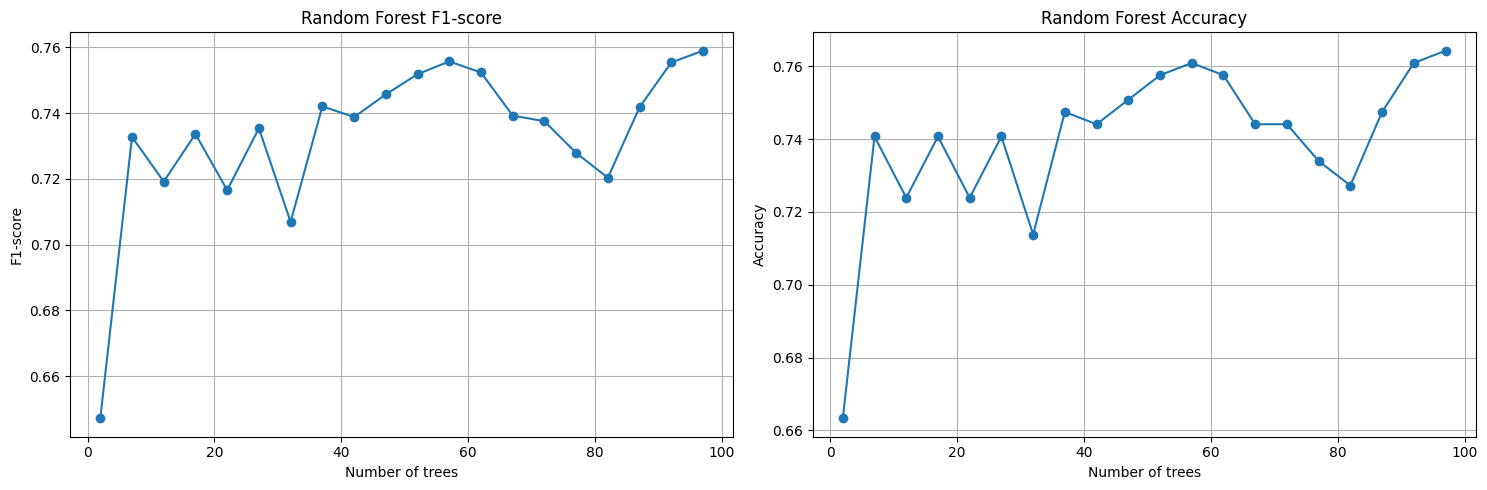

Optimal Random Forest size: 97 (F1: 0.7590)


In [67]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_range = range(2, 101, 5)
rf_f1, rf_acc = [], []

for n_est in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf.fit(X_train_final, y_train)
    y_pred = rf.predict(X_test_final)
    rf_f1.append(f1_score(y_test, y_pred, average='macro'))
    rf_acc.append(accuracy_score(y_test, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(n_estimators_range, rf_f1, marker='o')
ax1.set_xlabel('Number of trees')
ax1.set_ylabel('F1-score')
ax1.set_title('Random Forest F1-score')
ax1.grid(True)

ax2.plot(n_estimators_range, rf_acc, marker='o')
ax2.set_xlabel('Number of trees')
ax2.set_ylabel('Accuracy')
ax2.set_title('Random Forest Accuracy')
ax2.grid(True)
plt.tight_layout()
plt.show()

best_rf = n_estimators_range[np.argmax(rf_f1)]
print(f"Optimal Random Forest size: {best_rf} (F1: {max(rf_f1):.4f})")

RF needs more trees (97) vs bagging trees (47). Feature randomness in RF increases diversity but reduces individual tree strength, requiring more trees for optimal performance.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

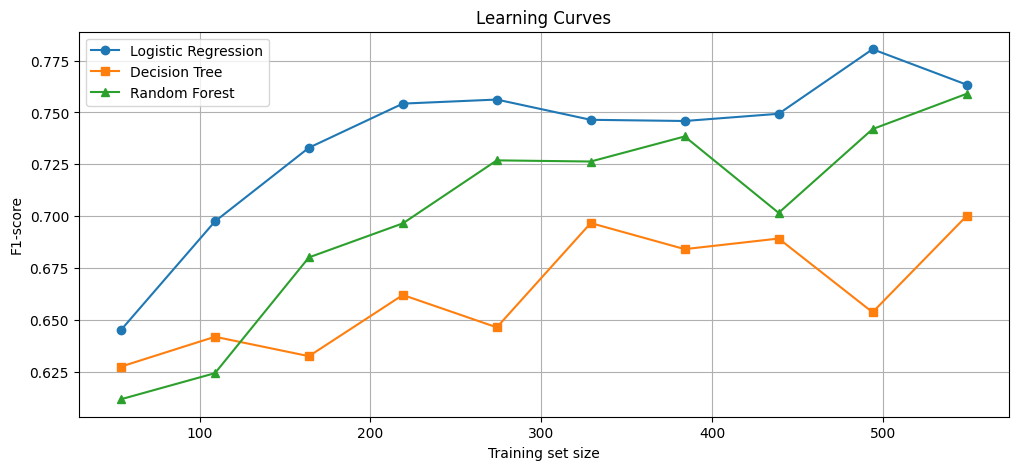

In [68]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

log_reg = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, random_state=42)
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier(n_estimators=97, random_state=42)

train_sizes = []
log_reg_scores, tree_scores, rf_scores = [], [], []

for i in range(1, 11):
    size = int(len(X_train_final) * i / 10)
    X_train_part = X_train_final[:size]
    y_train_part = y_train[:size]
    train_sizes.append(size)

    log_reg.fit(X_train_part, y_train_part)
    tree.fit(X_train_part, y_train_part)
    rf.fit(X_train_part, y_train_part)

    y_pred_lr = log_reg.predict(X_test_final)
    y_pred_tree = tree.predict(X_test_final)
    y_pred_rf = rf.predict(X_test_final)

    log_reg_scores.append(f1_score(y_test, y_pred_lr, average='macro'))
    tree_scores.append(f1_score(y_test, y_pred_tree, average='macro'))
    rf_scores.append(f1_score(y_test, y_pred_rf, average='macro'))

plt.figure(figsize=(12, 5))
plt.plot(train_sizes, log_reg_scores, marker='o', label='Logistic Regression')
plt.plot(train_sizes, tree_scores, marker='s', label='Decision Tree')
plt.plot(train_sizes, rf_scores, marker='^', label='Random Forest')
plt.xlabel('Training set size')
plt.ylabel('F1-score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

- Random Forest: Improves most with more data (high variance model) compared to DT

- Logistic Regression: Reaches plateau faster (stable model)

- Decision Tree: Overfits on small data, improves moderately

**Conclusion**: RF benefits most from large datasets compared to DT, LR is data-efficient

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [75]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

n_estimators_range = [50, 100, 150, 200, 250, 300]
best_score = 0
best_n_estimators = 0

for n_est in n_estimators_range:
    params = {
        'objective': 'multi:softmax',
        'num_class': 4,
        'max_depth': 6,
        'learning_rate': 0.1,
        'eval_metric': 'mlogloss'
    }

    model = xgb.train(
        params,
        xgb.DMatrix(X_train_final, label=y_train_encoded),
        num_boost_round=n_est
    )

    y_pred = model.predict(xgb.DMatrix(X_test_final))
    score = f1_score(y_test_encoded, y_pred, average='macro')

    if score > best_score:
        best_score = score
        best_n_estimators = n_est

print(f"Optimal number of trees: {best_n_estimators} (F1: {best_score:.4f})")

Optimal number of trees: 300 (F1: 0.7796)


Boosting requires more trees (300) than Random Forest (97) or Bagging (47). Each boosting tree is a weak learner that corrects previous errors. More trees allow the model to gradually reduce bias and learn complex patterns. F1-score of 0.7796 is the highest among all ensemble methods tested